<a href="https://colab.research.google.com/github/frasgado/Analisis_Censo_2020/blob/main/10_Segmentacion_Migracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#10. Análisis de los Segmentos que conforman a la Migración
- Migración intraestatal Cambio de lugar de residencia habitual de las personas dentro de una entidad federativa del país desde un municipio a otro
- Migración interestatal incluye a la población que residía en otra entidad federativa de México o en otro país en marzo de 2015.
> En este segmento, se encuentra países extranjeros

In [28]:
!pip install geopandas


In [29]:
!pip install pysal


**Instalación de ORCA en Google Colabs**

In [30]:
#INSTALL ORCA EN GOOGLE COLABS
#https://plotly.com/python/orca-management/

!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
E: Unable to locate package libgconf-2-4!pip
E: Couldn't find any package by glob 'libgconf-2-4!pip'
E: Unable to locate package install
E: Unable to locate package plotly
/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


**Importación de librerías**

In [31]:
import geopandas as gpd

import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
#import plotly.plotly as py
import plotly.express as px

In [32]:
#126, 014, 024 - 100
# 6, 888, 490  - ?
porcentaje = round((6888490 * 100)/126014024, 2)
porcentaje

#Tenemos una población de 6, 888, 490 que ha migrado que va desde los 5 años y más
#Representa el 5.47% de la población total (126, 014, 024 )


5.47

##**Extracción de la Información**



In [33]:
xls = pd.ExcelFile('/content/drive/MyDrive/CENSO2020/cpv2020_b_eum_04_migracion.xlsx')
df_1 = pd.read_excel(xls, '08')

#Cambiar nombre de las columnas
df_1.columns = ['lugar', 'sexo', 'tp_migracion', 'pobtotmig', 'busca_trabajo', 'cambio_u_ofertadetrabajo', 'reunirse_con_familia', 'secaso_o_unio','estudiar','inseguridad_o_violencia','desastres_naturales','deportado','otra_causa','no_especificado']
df_1 = df_1.iloc[17:len(df_1)-3,] 
df_1



,lugar,sexo,tp_migracion,pobtotmig,busca_trabajo,cambio_u_ofertadetrabajo,reunirse_con_familia,secaso_o_unio,estudiar,inseguridad_o_violencia,desastres_naturales,deportado,otra_causa,no_especificado
17,Estados Unidos Mexicanos,Total,Intraestatal,2530561,235315,259747,881459,363791,174494,83224,12017,0,503526,16988
18,Estados Unidos Mexicanos,Total,Interestatal2,3807844,814608,545614,1387218,245479,264933,168289,12158,0,304706,64839
19,Estados Unidos Mexicanos,Hombres,Total,3133324,629780,512291,959176,221783,220474,119100,10948,0,417459,42313
20,Estados Unidos Mexicanos,Hombres,Intraestatal,1215466,137455,153713,374706,144280,85551,39309,5454,0,266420,8578
21,Estados Unidos Mexicanos,Hombres,Interestatal2,1917858,492325,358578,584470,77503,134923,79791,5494,0,151039,33735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Otros países,Hombres,Interestatal2,29543,5318,9387,5810,1869,3075,833,83,82,2643,443
348,Otros países,Mujeres,Interestatal2,23961,2966,4352,8110,2072,2900,690,39,41,2424,367
349,País no especificado,Total,Interestatal2,1044,139,115,157,25,49,24,2,10,82,441
350,País no especificado,Hombres,Interestatal2,564,94,79,78,7,23,15,1,8,39,220


##**Obtener entidades por segmento que participan en la migración**

In [34]:
# Obtener listado de estados
estados_migracion = df_1[df_1['lugar'] != 'Estados Unidos Mexicanos']
estados_migracion = estados_migracion[estados_migracion['sexo'] == 'Total']
estados_migracion = estados_migracion[estados_migracion['tp_migracion'] != 'Total']
estados_migracion.reset_index(drop=True, inplace=True) 
estados_migracion

,lugar,sexo,tp_migracion,pobtotmig,busca_trabajo,cambio_u_ofertadetrabajo,reunirse_con_familia,secaso_o_unio,estudiar,inseguridad_o_violencia,desastres_naturales,deportado,otra_causa,no_especificado
0,01 Aguascalientes,Total,Intraestatal,15242,828,1270,6076,2683,708,392,8,0,3213,64
1,01 Aguascalientes,Total,Interestatal2,23665,3427,4857,9381,1802,1783,259,4,0,1532,620
2,02 Baja California,Total,Intraestatal,15800,2804,2415,5738,994,1241,483,21,0,1785,319
3,02 Baja California,Total,Interestatal2,89781,9328,10540,49941,4149,4868,2528,153,0,6523,1751
4,03 Baja California Sur,Total,Intraestatal,9388,1579,2183,3171,357,1385,79,10,0,581,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,República de El Salvador,Total,Interestatal2,7122,1654,337,1339,254,506,2687,4,21,270,50
73,República Argentina,Total,Interestatal2,6210,1016,1641,1684,576,394,81,5,11,642,160
74,República Federativa de Brasil,Total,Interestatal2,5929,998,1929,1636,354,345,107,1,3,501,55
75,Otros países,Total,Interestatal2,53504,8284,13739,13920,3941,5975,1523,122,123,5067,810


In [35]:
#Obtener porcentajes
estados_migracion['p_busca_trabajo'] = round((estados_migracion.busca_trabajo.astype(float) * 100/ estados_migracion.pobtotmig.astype(float) ), 2)	
estados_migracion['p_cambio_u_ofertadetrabajo'] = round((estados_migracion.cambio_u_ofertadetrabajo.astype(float) * 100/ estados_migracion.pobtotmig.astype(float) ), 2)
estados_migracion['p_reunirse_con_familia'] = round((estados_migracion.reunirse_con_familia.astype(float) * 100/ estados_migracion.pobtotmig.astype(float) ) , 2)
estados_migracion['p_secaso_o_unio'] = round((estados_migracion.secaso_o_unio.astype(float) * 100/ estados_migracion.pobtotmig.astype(float) ) , 2)
estados_migracion['p_estudiar'] = round((estados_migracion.estudiar.astype(float) * 100/ estados_migracion.pobtotmig.astype(float) ) , 2)
estados_migracion['p_inseguridad_o_violencia'] = round((estados_migracion.inseguridad_o_violencia.astype(float) * 100/ estados_migracion.pobtotmig.astype(float) ) , 2)
estados_migracion['p_desastres_naturales'] = round((estados_migracion.desastres_naturales.astype(float) * 100/ estados_migracion.pobtotmig.astype(float) ) , 2)
estados_migracion['p_deportado'] = round((estados_migracion.deportado.astype(float) * 100/ estados_migracion.pobtotmig.astype(float) ) , 2)
estados_migracion['p_otra_causa'] = round((estados_migracion.otra_causa.astype(float) * 100/ estados_migracion.pobtotmig.astype(float) ) , 2)
estados_migracion['p_no_especificado'] = round((estados_migracion.no_especificado.astype(float) * 100/ estados_migracion.pobtotmig.astype(float) ) , 2)
estados_migracion

,lugar,sexo,tp_migracion,pobtotmig,busca_trabajo,cambio_u_ofertadetrabajo,reunirse_con_familia,secaso_o_unio,estudiar,inseguridad_o_violencia,desastres_naturales,deportado,otra_causa,no_especificado,p_busca_trabajo,p_cambio_u_ofertadetrabajo,p_reunirse_con_familia,p_secaso_o_unio,p_estudiar,p_inseguridad_o_violencia,p_desastres_naturales,p_deportado,p_otra_causa,p_no_especificado
0,01 Aguascalientes,Total,Intraestatal,15242,828,1270,6076,2683,708,392,8,0,3213,64,5.43,8.33,39.86,17.60,4.65,2.57,0.05,0.00,21.08,0.42
1,01 Aguascalientes,Total,Interestatal2,23665,3427,4857,9381,1802,1783,259,4,0,1532,620,14.48,20.52,39.64,7.61,7.53,1.09,0.02,0.00,6.47,2.62
2,02 Baja California,Total,Intraestatal,15800,2804,2415,5738,994,1241,483,21,0,1785,319,17.75,15.28,36.32,6.29,7.85,3.06,0.13,0.00,11.30,2.02
3,02 Baja California,Total,Interestatal2,89781,9328,10540,49941,4149,4868,2528,153,0,6523,1751,10.39,11.74,55.63,4.62,5.42,2.82,0.17,0.00,7.27,1.95
4,03 Baja California Sur,Total,Intraestatal,9388,1579,2183,3171,357,1385,79,10,0,581,43,16.82,23.25,33.78,3.80,14.75,0.84,0.11,0.00,6.19,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,República de El Salvador,Total,Interestatal2,7122,1654,337,1339,254,506,2687,4,21,270,50,23.22,4.73,18.80,3.57,7.10,37.73,0.06,0.29,3.79,0.70
73,República Argentina,Total,Interestatal2,6210,1016,1641,1684,576,394,81,5,11,642,160,16.36,26.43,27.12,9.28,6.34,1.30,0.08,0.18,10.34,2.58
74,República Federativa de Brasil,Total,Interestatal2,5929,998,1929,1636,354,345,107,1,3,501,55,16.83,32.53,27.59,5.97,5.82,1.80,0.02,0.05,8.45,0.93
75,Otros países,Total,Interestatal2,53504,8284,13739,13920,3941,5975,1523,122,123,5067,810,15.48,25.68,26.02,7.37,11.17,2.85,0.23,0.23,9.47,1.51


Creacción de Estructura para guardar información de los segmentos

In [36]:
columnas = ['tipo_migracion', 'pobtotmig']
 
ranking_por_segmento = pd.DataFrame(columns=columnas)


In [37]:
#intraestatal 
df_filtered = estados_migracion[estados_migracion['tp_migracion'] =='Intraestatal']

ranking_por_segmento.loc[0,'tipo_migracion'] = 'Estados Unidos Mexicanos<br>Intra-estatal¹'
ranking_por_segmento.loc[0,'pobtotmig'] = df_filtered['pobtotmig'].sum()
ranking_por_segmento

,tipo_migracion,pobtotmig
0,Estados Unidos Mexicanos<br>Intra-estatal¹,2530561


In [38]:
#interestatal nacional
df_filtered_inter = estados_migracion[estados_migracion['tp_migracion'] =='Interestatal2']

#otro = df_filtered_inter.loc[df_filtered_inter['lugar'].apply(lambda x: len(x.split(' ')) == 2)]
#otro = df_filtered_inter.loc[df_filtered_inter['lugar'].apply(lambda x:(x.split(' '))[0] == '01' )]
estados_interestatal = df_filtered_inter.loc[df_filtered_inter['lugar'].apply(lambda x:(x.split(' '))[0] in ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32']  )]

ranking_por_segmento.loc[1,'tipo_migracion'] = 'Estados Unidos Mexicanos<br>Inter-estatal²'
ranking_por_segmento.loc[1,'pobtotmig'] = estados_interestatal['pobtotmig'].sum()
ranking_por_segmento

,tipo_migracion,pobtotmig
0,Estados Unidos Mexicanos<br>Intra-estatal¹,2530561
1,Estados Unidos Mexicanos<br>Inter-estatal²,3807844


In [39]:
estados_interestatal

,lugar,sexo,tp_migracion,pobtotmig,busca_trabajo,cambio_u_ofertadetrabajo,reunirse_con_familia,secaso_o_unio,estudiar,inseguridad_o_violencia,desastres_naturales,deportado,otra_causa,no_especificado,p_busca_trabajo,p_cambio_u_ofertadetrabajo,p_reunirse_con_familia,p_secaso_o_unio,p_estudiar,p_inseguridad_o_violencia,p_desastres_naturales,p_deportado,p_otra_causa,p_no_especificado
1,01 Aguascalientes,Total,Interestatal2,23665,3427,4857,9381,1802,1783,259,4,0,1532,620,14.48,20.52,39.64,7.61,7.53,1.09,0.02,0.0,6.47,2.62
3,02 Baja California,Total,Interestatal2,89781,9328,10540,49941,4149,4868,2528,153,0,6523,1751,10.39,11.74,55.63,4.62,5.42,2.82,0.17,0.0,7.27,1.95
5,03 Baja California Sur,Total,Interestatal2,26996,3285,4051,12818,985,3164,301,347,0,1679,366,12.17,15.01,47.48,3.65,11.72,1.11,1.29,0.0,6.22,1.36
7,04 Campeche,Total,Interestatal2,44034,9878,6982,16761,2106,3955,735,34,0,2889,694,22.43,15.86,38.06,4.78,8.98,1.67,0.08,0.0,6.56,1.58
9,05 Coahuila de Zaragoza,Total,Interestatal2,58980,10403,10274,23625,4184,4802,839,28,0,3697,1128,17.64,17.42,40.06,7.09,8.14,1.42,0.05,0.0,6.27,1.91
11,06 Colima,Total,Interestatal2,28088,4742,5123,11963,1446,1823,837,17,0,1619,518,16.88,18.24,42.59,5.15,6.49,2.98,0.06,0.0,5.76,1.84
13,07 Chiapas,Total,Interestatal2,160125,72980,18196,45036,6128,9966,789,183,0,4861,1986,45.58,11.36,28.13,3.83,6.22,0.49,0.11,0.0,3.04,1.24
15,08 Chihuahua,Total,Interestatal2,60224,8807,9290,26360,3467,4154,3254,48,0,3698,1146,14.62,15.43,43.77,5.76,6.90,5.40,0.08,0.0,6.14,1.90
17,09 Ciudad de México,Total,Interestatal2,557181,50569,76804,206886,44923,20535,39355,7644,0,98550,11915,9.08,13.78,37.13,8.06,3.69,7.06,1.37,0.0,17.69,2.14
19,10 Durango,Total,Interestatal2,54705,13558,6858,20628,4053,4368,900,23,0,3238,1079,24.78,12.54,37.71,7.41,7.98,1.65,0.04,0.0,5.92,1.97


In [40]:
#interestatal con extranjeros
paises_extranjeros_interestatal = df_filtered_inter.loc[df_filtered_inter['lugar'].apply(lambda x:(x.split(' '))[0] not in ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32']  )]

ranking_por_segmento.loc[2,'tipo_migracion'] = 'Países Extranjeros<br>Inter-estatal³'
ranking_por_segmento.loc[2,'pobtotmig'] = paises_extranjeros_interestatal['pobtotmig'].sum()
ranking_por_segmento

,tipo_migracion,pobtotmig
0,Estados Unidos Mexicanos<br>Intra-estatal¹,2530561
1,Estados Unidos Mexicanos<br>Inter-estatal²,3807844
2,Países Extranjeros<br>Inter-estatal³,550085


In [41]:
import plotly.graph_objects as go

segmentos = ranking_por_segmento['tipo_migracion']
colors = ['crimson']

fig = go.Figure([go.Bar(x=segmentos, y=ranking_por_segmento['pobtotmig'], text=ranking_por_segmento['pobtotmig'])])
fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
fig.update_layout(
    title='Segmentos que integran la Migración en México  (Intraestatal¹ e Interestatal²)<br>Población de 5 años y más migrante por entidad federativa o país de residencia en marzo de 2015, sexo y tipo de migración<br>Entre Marzo de 2015 y 2020',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
      xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.62], #0.42
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=100),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)'
)

annotations = []

annotations.append(dict(xref='paper', yref='paper',
                        x=-0.02, #x=-0.2, 
                        y=-0.151,
                        text='¹ Migración intraestatal Cambio de lugar de residencia habitual de las personas dentro de una entidad federativa del país desde un municipio a otro',
                        font=dict(family='Arial', size=11, color='rgb(150,150,150)'),
                        showarrow=False))

annotations.append(dict(xref='paper', yref='paper',
                        x=-0.02, #x=-0.10, #0.20 
                        y=-0.185,
                        text='² y ³ Migración interestatal población que residía en otra entidad federativa de México o en otro país en marzo de 2015',
                        font=dict(family='Arial', size=11, color='rgb(150,150,150)'),
                        showarrow=False))


annotations.append(dict(xref='paper', yref='paper',
                        x=-0.02, #x=-0.2, 
                        y=-0.220,#y=-0.149,
                        text='Fuente: INEGI. Censo de Población y Vivienda 2020.',
                        font=dict(family='Arial', size=11, color='rgb(150,150,150)'),
                        showarrow=False))
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.02, #x=-0.10, #0.20 
                        y=-0.255, #y=-0.15,
                        text='Elaboró: Fabiola Rasgado.',
                        font=dict(family='Arial', size=11, color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)


fig.show()
fig.write_html("10_segmentos_migracion.html")

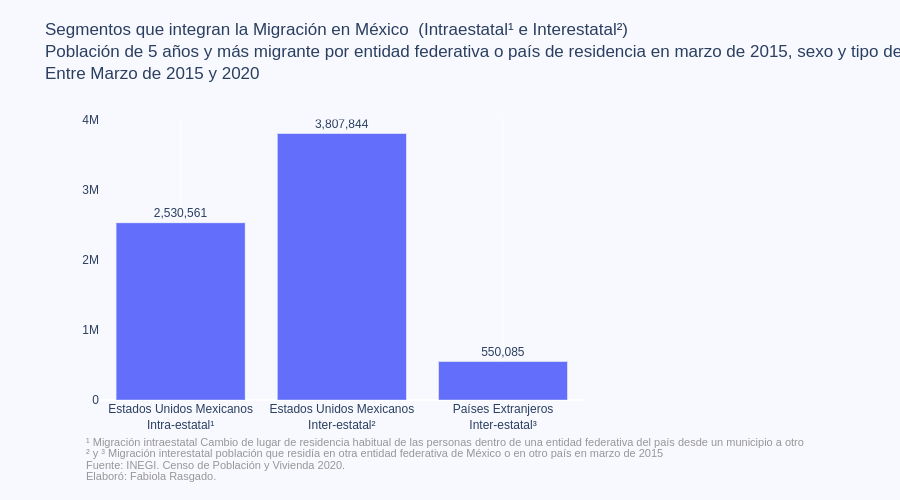

In [42]:
# Exportar en formato png 
# En formato HTML, se tiene mejor experiencia de usuario porque hay interacción 
# con los datos de la gráfica.
#height=350, 
img_bytes = fig.to_image(format="png", width=900, scale=1)
from IPython.display import Image
Image(img_bytes)

Visualización por segmento, estados y causas de migración

Estados Unidos Mexicanos Intraestatal

In [43]:
df_filtered
# pobtotmig
# p_busca_trabajo	p_cambio_u_ofertadetrabajo	p_reunirse_con_familia	p_secaso_o_unio	p_estudiar	p_inseguridad_o_violencia	p_desastres_naturales	p_deportado	p_otra_causa	p_no_especificado


,lugar,sexo,tp_migracion,pobtotmig,busca_trabajo,cambio_u_ofertadetrabajo,reunirse_con_familia,secaso_o_unio,estudiar,inseguridad_o_violencia,desastres_naturales,deportado,otra_causa,no_especificado,p_busca_trabajo,p_cambio_u_ofertadetrabajo,p_reunirse_con_familia,p_secaso_o_unio,p_estudiar,p_inseguridad_o_violencia,p_desastres_naturales,p_deportado,p_otra_causa,p_no_especificado
0,01 Aguascalientes,Total,Intraestatal,15242,828,1270,6076,2683,708,392,8,0,3213,64,5.43,8.33,39.86,17.60,4.65,2.57,0.05,0.0,21.08,0.42
2,02 Baja California,Total,Intraestatal,15800,2804,2415,5738,994,1241,483,21,0,1785,319,17.75,15.28,36.32,6.29,7.85,3.06,0.13,0.0,11.30,2.02
4,03 Baja California Sur,Total,Intraestatal,9388,1579,2183,3171,357,1385,79,10,0,581,43,16.82,23.25,33.78,3.80,14.75,0.84,0.11,0.0,6.19,0.46
6,04 Campeche,Total,Intraestatal,7478,1143,1223,2696,717,931,180,5,0,551,32,15.28,16.35,36.05,9.59,12.45,2.41,0.07,0.0,7.37,0.43
8,05 Coahuila de Zaragoza,Total,Intraestatal,36209,6105,4868,13753,3690,2417,433,11,0,4664,268,16.86,13.44,37.98,10.19,6.68,1.20,0.03,0.0,12.88,0.74
10,06 Colima,Total,Intraestatal,15918,1259,1953,5623,1853,1453,595,4,0,3129,49,7.91,12.27,35.32,11.64,9.13,3.74,0.03,0.0,19.66,0.31
12,07 Chiapas,Total,Intraestatal,69239,9567,8977,25944,7810,7859,849,232,0,7478,523,13.82,12.97,37.47,11.28,11.35,1.23,0.34,0.0,10.80,0.76
14,08 Chihuahua,Total,Intraestatal,48108,10422,6161,16629,3256,6819,1510,9,0,3015,287,21.66,12.81,34.57,6.77,14.17,3.14,0.02,0.0,6.27,0.60
16,09 Ciudad de México,Total,Intraestatal,286103,16238,31903,67378,52826,10670,12548,7738,0,84755,2047,5.68,11.15,23.55,18.46,3.73,4.39,2.70,0.0,29.62,0.72
18,10 Durango,Total,Intraestatal,18761,2800,2240,6921,2200,2453,287,7,0,1743,110,14.92,11.94,36.89,11.73,13.07,1.53,0.04,0.0,9.29,0.59


In [44]:
#Renombrar columnas
# p_busca_trabajo	p_cambio_u_ofertadetrabajo	p_reunirse_con_familia	
#p_secaso_o_unio	p_estudiar	p_inseguridad_o_violencia	p_desastres_naturales	
#p_deportado	p_otra_causa	p_no_especificado

df_filtered = df_filtered.rename(columns={'p_busca_trabajo':'BUSQUEDA DE TRABAJO',
                                   'p_cambio_u_ofertadetrabajo':'CAMBIO U OFERTA DE TRABAJO',
                                   'p_reunirse_con_familia': 'REUNIRSE CON FAMILIARES',
                                   'p_secaso_o_unio':'CAMBIO DE ESTADO CIVIL',
                                   'p_estudiar':'ESTUDIOS ESCOLARES',
                                   'p_inseguridad_o_violencia':'INSEGURIDAD O VIOLENCIA',
                                   'p_desastres_naturales':'DESASTRES NATURALES',
                                   'p_deportado':'DEPORTACION',
                                   'p_otra_causa':'OTRA CAUSA',
                                   'p_no_especificado':'NO ESPECIFICADO'})
df_filtered.columns

Index(['lugar', 'sexo', 'tp_migracion', 'pobtotmig', 'busca_trabajo',
       'cambio_u_ofertadetrabajo', 'reunirse_con_familia', 'secaso_o_unio',
       'estudiar', 'inseguridad_o_violencia', 'desastres_naturales',
       'deportado', 'otra_causa', 'no_especificado', 'BUSQUEDA DE TRABAJO',
       'CAMBIO U OFERTA DE TRABAJO', 'REUNIRSE CON FAMILIARES',
       'CAMBIO DE ESTADO CIVIL', 'ESTUDIOS ESCOLARES',
       'INSEGURIDAD O VIOLENCIA', 'DESASTRES NATURALES', 'DEPORTACION',
       'OTRA CAUSA', 'NO ESPECIFICADO'],
      dtype='object')

In [45]:
# df_filtered
# pobtotmig
# p_busca_trabajo	p_cambio_u_ofertadetrabajo	p_reunirse_con_familia	p_secaso_o_unio	p_estudiar	p_inseguridad_o_violencia	p_desastres_naturales	p_deportado	p_otra_causa	p_no_especificado

df_filtered['CVEGEO'] = df_filtered['lugar'].astype(str).str[:2]
df_filtered['NOMGEO'] = df_filtered['lugar'].astype(str).str[3:]

porc = df_filtered.melt(id_vars=["NOMGEO"], 
                        value_vars = ['BUSQUEDA DE TRABAJO','CAMBIO U OFERTA DE TRABAJO',
                                      'REUNIRSE CON FAMILIARES','CAMBIO DE ESTADO CIVIL',
                                      'ESTUDIOS ESCOLARES', 'INSEGURIDAD O VIOLENCIA',
                                      'DESASTRES NATURALES', 'DEPORTACION',
                                      'OTRA CAUSA', 'NO ESPECIFICADO'
                                      ],
                        var_name='CAUSAS DE LA MIGRACION', 
                        value_name='porcentaje'
                        )

porc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NOMGEO                  320 non-null    object 
 1   CAUSAS DE LA MIGRACION  320 non-null    object 
 2   porcentaje              320 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.6+ KB


In [49]:
# GRAFICA REALIZADA CON ALTAIR
import altair as alt
chart = alt.Chart(porc).mark_bar().encode(
    x=alt.X('sum(porcentaje)', stack="normalize"),
    y='NOMGEO',
    color='CAUSAS DE LA MIGRACION'
)
# agregar título de gráfico
chart.title = "% DE REPRESENTACION PARA EL SEGMENTO INTRAESTATAL - CENSO 2020"
# ajustar las etiquetas de los ejes xey
chart.encoding.x.title = "% CAUSA MIGRACION"
chart.encoding.y.title = "ESTADOS UNIDOS MEXICANOS"
# mostrar gráfico modificado
chart

chart.save('10_SEGMENTACION_INTRAESTATAL.html')

In [47]:
pip install altair_saver


In [66]:
pip install selenium

In [72]:
pip install kora -q

     |████████████████████████████████| 61kB 3.4MB/s 
     |████████████████████████████████| 61kB 4.9MB/s 


In [73]:
from kora.selenium import wd

In [74]:
wd.get("https://www.website.com")

In [78]:
chart.save('10_SEGMENTACION_INTRAESTATAL.png')
#scale_factor=2.0


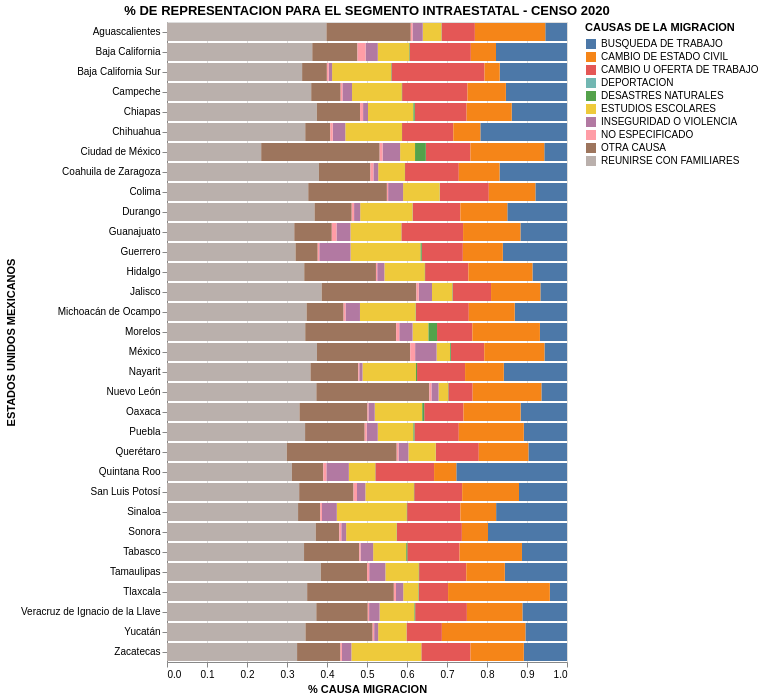

In [77]:
# Exportar en formato png 
# En formato HTML, se tiene mejor experiencia de usuario porque hay interacción 
# con los datos de la gráfica.
#height=350,
#img_bytes = fig.to_image(format="png", width=900, scale=1)
from IPython.display import Image
Image('10_SEGMENTACION_INTRAESTATAL.png')

In [ ]:
porc

In [79]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x=porc['porcentaje'], y=porc['NOMGEO'], color=porc['CAUSAS DE LA MIGRACION'], orientation='h',
             #hover_data=['x', 'y'],
             height=800, 
             width=1300,
             title='% DE REPRESENTACION PARA EL SEGMENTO INTRAESTATAL - CENSO 2020')

fig.update_layout(
    title='<b>% DE REPRESENTACION PARA EL SEGMENTO INTRAESTATAL, entre Marzo de 2015 y Marzo de 2020<br>CENSO 2020</b>',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.95], #0.85
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.72], #0.42
    ),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

fig.update_layout(
    yaxis=dict(
        title='',
    ),
    xaxis=dict(
        title='Fuente: INEGI. Censo de Población y Vivienda 2020.<br>Elaboró: Fabiola Rasgado</br>',
    )
)

fig.show()
fig.write_html("10_1_represen_segmento_intraestatal.html")

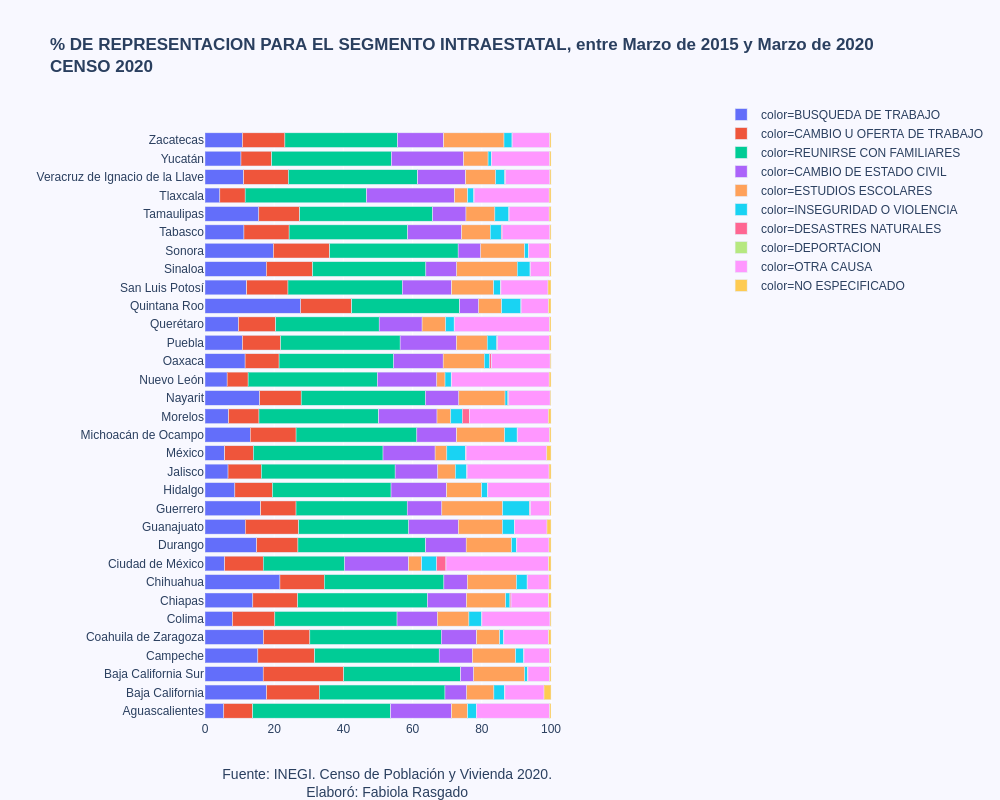

In [80]:
img_bytes = fig.to_image(format="png", width=1000, scale=1)
from IPython.display import Image
Image(img_bytes)

Estados Unidos Mexicanos  Interestatal

In [ ]:
estados_interestatal

In [81]:
#df_filtered_inter
df_filtered_inter2 = estados_interestatal.rename(columns={'p_busca_trabajo':'BUSQUEDA DE TRABAJO',
                                   'p_cambio_u_ofertadetrabajo':'CAMBIO U OFERTA DE TRABAJO',
                                   'p_reunirse_con_familia': 'REUNIRSE CON FAMILIARES',
                                   'p_secaso_o_unio':'CAMBIO DE ESTADO CIVIL',
                                   'p_estudiar':'ESTUDIOS ESCOLARES',
                                   'p_inseguridad_o_violencia':'INSEGURIDAD O VIOLENCIA',
                                   'p_desastres_naturales':'DESASTRES NATURALES',
                                   'p_deportado':'DEPORTACION',
                                   'p_otra_causa':'OTRA CAUSA',
                                   'p_no_especificado':'NO ESPECIFICADO'})
df_filtered_inter2.columns

df_filtered_inter2['CVEGEO'] = df_filtered_inter2['lugar'].astype(str).str[:2]
df_filtered_inter2['NOMGEO'] = df_filtered_inter2['lugar'].astype(str).str[3:]

porc_eum_interestatal = df_filtered_inter2.melt(id_vars=["NOMGEO"], 
                        value_vars = ['BUSQUEDA DE TRABAJO','CAMBIO U OFERTA DE TRABAJO',
                                      'REUNIRSE CON FAMILIARES','CAMBIO DE ESTADO CIVIL',
                                      'ESTUDIOS ESCOLARES', 'INSEGURIDAD O VIOLENCIA',
                                      'DESASTRES NATURALES', 'DEPORTACION',
                                      'OTRA CAUSA', 'NO ESPECIFICADO'
                                      ],
                        var_name='CAUSAS DE LA MIGRACION', 
                        value_name='porcentaje'
                        )

porc_eum_interestatal

,NOMGEO,CAUSAS DE LA MIGRACION,porcentaje
0,Aguascalientes,BUSQUEDA DE TRABAJO,14.48
1,Baja California,BUSQUEDA DE TRABAJO,10.39
2,Baja California Sur,BUSQUEDA DE TRABAJO,12.17
3,Campeche,BUSQUEDA DE TRABAJO,22.43
4,Coahuila de Zaragoza,BUSQUEDA DE TRABAJO,17.64
...,...,...,...
315,Tamaulipas,NO ESPECIFICADO,1.52
316,Tlaxcala,NO ESPECIFICADO,1.93
317,Veracruz de Ignacio de la Llave,NO ESPECIFICADO,1.38
318,Yucatán,NO ESPECIFICADO,1.91


In [82]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x=porc_eum_interestatal['porcentaje'], 
             y=porc_eum_interestatal['NOMGEO'], 
             color=porc_eum_interestatal['CAUSAS DE LA MIGRACION'], 
             orientation='h',
             height=800, 
             width=1300,
             title='')

fig.update_layout(
    title='<b>% DE REPRESENTACION PARA EL SEGMENTO ESTADO UNIDOS MEXICANOS INTERESTATAL<BR>Entre Marzo de 2015 y Marzo de 2020<br>CENSO 2020</b>',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.95], #0.85
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.72], #0.42
    ),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

fig.update_layout(
    yaxis=dict(
        title='',
    ),
    xaxis=dict(
        title='Fuente: INEGI. Censo de Población y Vivienda 2020.<br>Elaboró: Fabiola Rasgado</br>',
    )
)

fig.show()
fig.write_html("10_2_represen_segmento_interestatal.html")

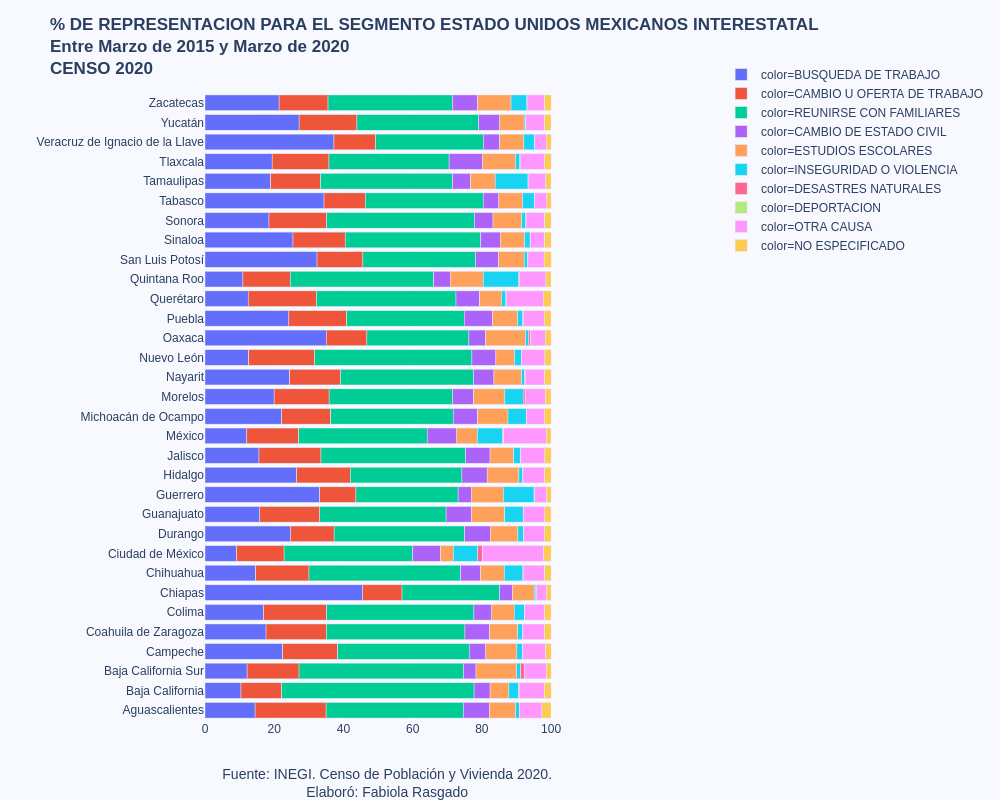

In [83]:
img_bytes = fig.to_image(format="png", width=1000, scale=1)
from IPython.display import Image
Image(img_bytes)

Países Extranjeros Interestatal

In [ ]:
paises_extranjeros_interestatal

In [84]:
#paises_extranjeros_interestatal
paises_extranjeros_interestatal2 = paises_extranjeros_interestatal.rename(columns={'p_busca_trabajo':'BUSQUEDA DE TRABAJO',
                                   'p_cambio_u_ofertadetrabajo':'CAMBIO U OFERTA DE TRABAJO',
                                   'p_reunirse_con_familia': 'REUNIRSE CON FAMILIARES',
                                   'p_secaso_o_unio':'CAMBIO DE ESTADO CIVIL',
                                   'p_estudiar':'ESTUDIOS ESCOLARES',
                                   'p_inseguridad_o_violencia':'INSEGURIDAD O VIOLENCIA',
                                   'p_desastres_naturales':'DESASTRES NATURALES',
                                   'p_deportado':'DEPORTACION',
                                   'p_otra_causa':'OTRA CAUSA',
                                   'p_no_especificado':'NO ESPECIFICADO'})
paises_extranjeros_interestatal2.columns

# paises_extranjeros_interestatal2['CVEGEO'] = paises_extranjeros_interestatal2['lugar'].astype(str).str[:2]
# paises_extranjeros_interestatal2['NOMGEO'] = paises_extranjeros_interestatal2['lugar'].astype(str).str[3:]

porc_pe_interestatal = paises_extranjeros_interestatal2.melt(id_vars=["lugar"], 
                        value_vars = ['BUSQUEDA DE TRABAJO','CAMBIO U OFERTA DE TRABAJO',
                                      'REUNIRSE CON FAMILIARES','CAMBIO DE ESTADO CIVIL',
                                      'ESTUDIOS ESCOLARES', 'INSEGURIDAD O VIOLENCIA',
                                      'DESASTRES NATURALES', 'DEPORTACION',
                                      'OTRA CAUSA', 'NO ESPECIFICADO'
                                      ],
                        var_name='CAUSAS DE LA MIGRACION', 
                        value_name='porcentaje'
                        )

porc_pe_interestatal

,lugar,CAUSAS DE LA MIGRACION,porcentaje
0,Estados Unidos de América,BUSQUEDA DE TRABAJO,11.90
1,República Bolivariana de Venezuela,BUSQUEDA DE TRABAJO,14.13
2,República de Colombia,BUSQUEDA DE TRABAJO,14.37
3,República de Honduras,BUSQUEDA DE TRABAJO,31.08
4,República de Guatemala,BUSQUEDA DE TRABAJO,46.24
...,...,...,...
125,República de El Salvador,NO ESPECIFICADO,0.70
126,República Argentina,NO ESPECIFICADO,2.58
127,República Federativa de Brasil,NO ESPECIFICADO,0.93
128,Otros países,NO ESPECIFICADO,1.51


In [85]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, 
             x=porc_pe_interestatal['porcentaje'], 
             y=porc_pe_interestatal['lugar'], 
             color=porc_pe_interestatal['CAUSAS DE LA MIGRACION'], 
             orientation='h',
             height=800, 
             width=1300
             )

fig.update_layout(
    title='<b>% DE REPRESENTACION PARA EL SEGMENTO PAISES EXTRANJEROS INTERESTATAL<br>Entre Marzo de 2015 y Marzo de 2020<br>CENSO 2020</b>',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.95], #0.85
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.72], #0.42
    ),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

fig.update_layout(
    yaxis=dict(
        title='',
    ),
    xaxis=dict(
        title='Fuente: INEGI. Censo de Población y Vivienda 2020.<br>Elaboró: Fabiola Rasgado</br>',
    )
)

fig.show()
fig.write_html("10_3_represen_segmento_pe_interestatal.html")

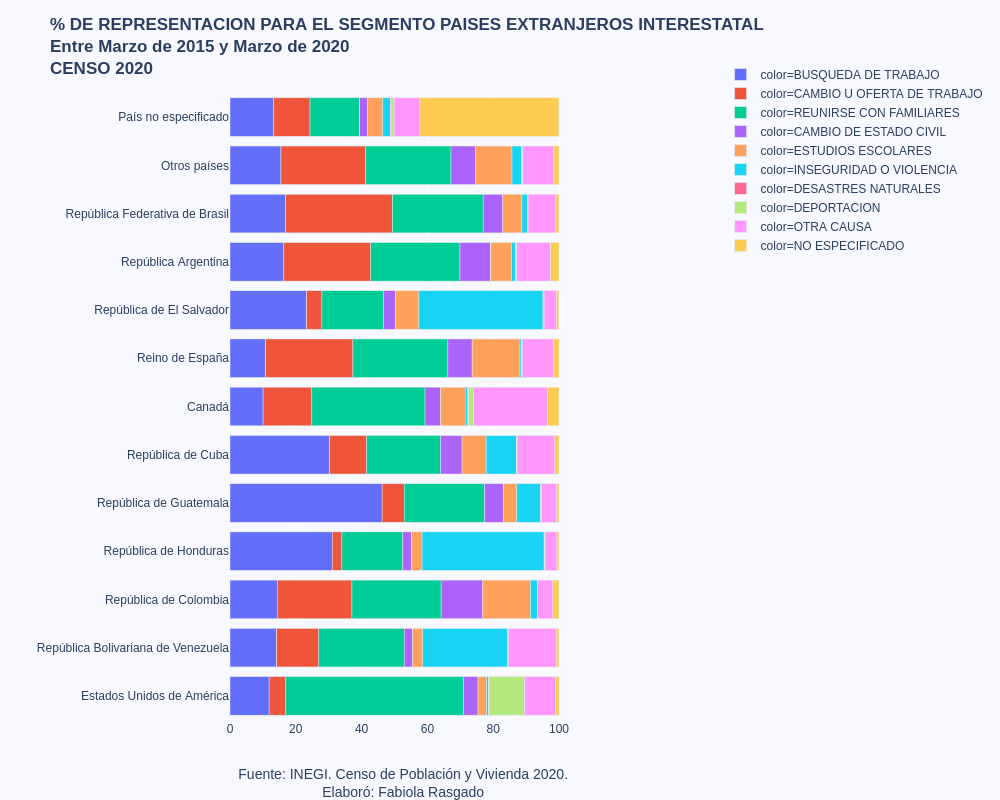

In [86]:
img_bytes = fig.to_image(format="png", width=1000, scale=1)
from IPython.display import Image
Image(img_bytes)